| ESCUELA POLITÉCNICA NACIONAL  |                              | Tarea No. |
|-------------------------------|------------------------------|--------------|
| **Metodos Numericos – Computación**     | | **4**        |
| NOMBRE: Ivonne Carolina Ayala |                              |              |

## Bisección

### 1. Método de Bisección para Encontrar Soluciones

Use el método de bisección para encontrar las soluciones precisas (con una tolerancia de $10^{-2}$) de la siguiente ecuación:

$$
x^3 - 7x^2 + 14x - 6 = 0
$$

en cada intervalo dado.


In [29]:
def bisection_method(func, X0, XF, tol=1e-5):
    if func(X0) * func(XF) >= 0:
        print("La función no tiene raíces o tiene múltiples raíces en el intervalo dado.")
        return None

    Xm = X0
    while abs(XF - X0) >= tol:
        Xm = (X0 + XF) / 2
        if func(Xm) == 0.0:
            break
        if func(Xm) * func(X0) < 0:
            XF = Xm
        else:
            X0 = Xm
    
    return round(Xm, 9)


In [17]:
def F(x):
    return x**3 - 7*x**2 + 14*x - 6

#### a. Intervalo $[0, 1]$

In [18]:
X0, XF = 0, 1
root = bisection_method(F,X0, XF)
print(f"La raíz en el intervalo [{X0}, {XF}] es: {root}")

La raíz en el intervalo [0, 1] es: 0.585792542


#### b. Intervalo $[1, 3.2]$

In [19]:
X0, XF = 1, 3.2
root = bisection_method(F,X0, XF)
print(f"La raíz en el intervalo [{X0}, {XF}] es: {root}")

La raíz en el intervalo [1, 3.2] es: 3.000002289


#### c. Intervalo $[3.2,4]$

In [20]:
X0, XF = 3.2, 4
root = bisection_method(F,X0, XF)
print(f"La raíz en el intervalo [{X0}, {XF}] es: {root}")

La raíz en el intervalo [3.2, 4] es: 3.414215088


### 4. Representación Gráfica de Funciones

#### a. Dibujar las Gráficas

Dibuje las gráficas de las siguientes funciones en el mismo sistema de coordenadas:

1. $y = x^2 - 1$
2. $y = e^{1 - x^2}$


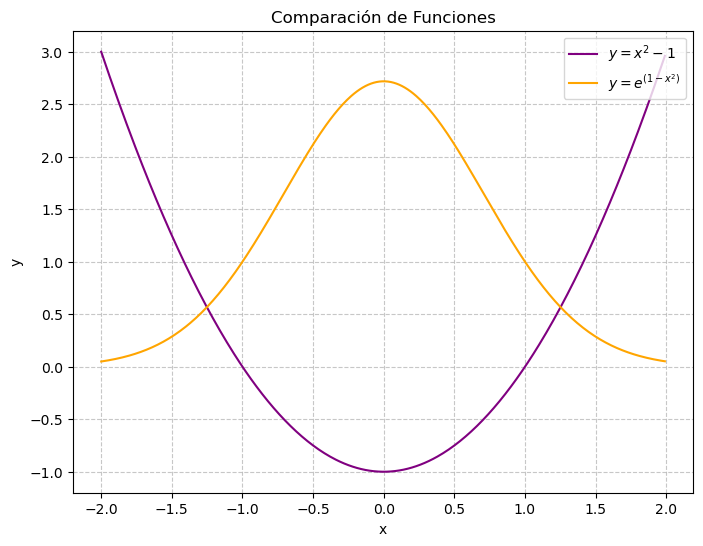

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.arange(-2, 2, 0.01)
func1 = lambda x: x**2 - 1
func2 = lambda x: np.exp(1 - x**2)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, func1(x_vals), color='purple', label=r'$y = x^2 - 1$')
plt.plot(x_vals, func2(x_vals), color='orange', label=r'$y = e^{(1 - x^2)}$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de Funciones')
plt.legend(loc='upper right')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


#### b. Método de Bisección para Aproximación

Use el método de bisección para encontrar una aproximación (con una tolerancia de $10^{-3}$) del valor de $x$ que satisface la ecuación:

$$
x^2 - 1 = e^{1 - x^2}
$$

en el intervalo $[-2, 0]$.


In [22]:
def F1(x):
    return x**2 - 1 - np.exp(1-x**2)
X0,XF = -2, 0
root = bisection_method(F1,X0, XF)
print(f"La raíz para la funcion es: {root}")

La raíz para la funcion es: -1.251853943


### EJERCICIOS APLICADOS 

### 1. Cálculo del Volumen de Agua en un Abrevadero

Un abrevadero de longitud $L$ tiene una sección transversal en forma de semicírculo con radio $r$ (consulte la figura adjunta). Cuando se llena con agua hasta una distancia $h$ desde la parte superior, el volumen $V$ de agua se calcula como:

$$
V = L \left[ 0.5\pi r^2 - r^2 \arcsin\left(\frac{h}{r}\right) - h \sqrt{r^2 - h^2} \right]
$$

**Nota**: $\arcsin$ representa la función arco seno, y $h \leq r$ para asegurar que la altura del agua esté dentro del semicírculo.


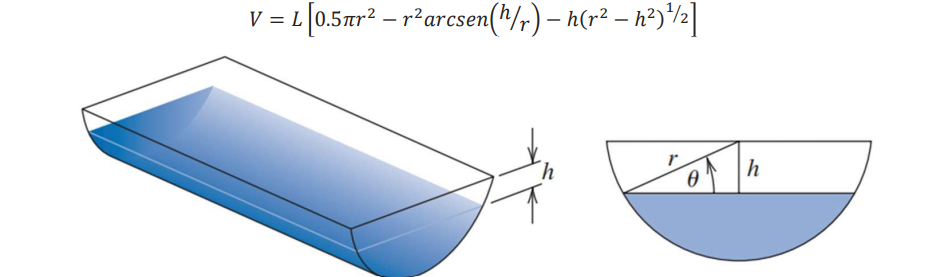

#### Encontrar la Profundidad del Agua

Suponga que el abrevadero tiene las siguientes dimensiones:

- Longitud $L = 10 \, \text{cm}$
- Radio $r = 1 \, \text{cm}$
- Volumen de agua $V = 12.4 \, \text{cm}^3$

Encuentre la profundidad del agua $h$ en el abrevadero con una precisión de $0.01 \, \text{cm}$.


In [26]:

def V(h, L=10, r=1):
    return L * (0.5 * np.pi * r**2 - r**2 * np.arcsin(h/r) - h * np.sqrt(r**2 - h**2)) - 12.4

a, b = 0, 1 # Intervalo inicial
root = bisection_method(V, a, b, tol=0.01)
print(f"La profundidad del agua es: {root} cm")


La profundidad del agua es: 0.1640625 cm


### 2. Caída de un Objeto con Resistencia Viscosa

Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza de gravedad. Suponga que un objeto con masa $m$ cae desde una altura $s_0$, y que la altura del objeto después de $t$ segundos está dada por:

$$
s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left( 1 - e^{-kt/m} \right)
$$

donde:

- $g = 9.81 \, \text{m/s}^2$ es la aceleración debido a la gravedad.
- $k$ es el coeficiente de resistencia del aire en $N \cdot s/m$.

Suponga los siguientes valores:

- Altura inicial $s_0 = 300 \, \text{m}$
- Masa del objeto $m = 0.25 \, \text{kg}$
- Coeficiente de resistencia $k = 0.1 \, \text{N} \cdot \text{s/m}$

Encuentre, con una precisión de $0.01$ segundos, el tiempo que tarda el objeto en golpear el suelo.


In [33]:
import numpy as np

s0 = 300
m = 0.25
g = 9.81
k = 0.1

def s(t):
    return s0 - (m * g / k) * t + (m**2 * g / k**2) * (1 - np.exp(-k * t / m))

a, b = 0, 100
tol = 0.01
root = bisection_method(s, a, b, tol)
print(f"El tiempo que tarda en golpear el piso es aproximadamente: {root:.9g} segundos")

El tiempo que tarda en golpear el piso es aproximadamente: 14.7277832 segundos


### Ejercicios Teóricos

#### Uso del Teorema 2.1 para Encontrar la Cota de Iteraciones

Use el Teorema 2.1 para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de $10^{-4}$ para la solución de la siguiente ecuación:

$$
x^3 - x - 1 = 0
$$

dentro del intervalo $[1, 2]$. 

Luego, encuentre una aproximación de la raíz con este grado de precisión.


In [34]:
def f(x):
    return x**3 - x - 1

a, b = 1, 2
epsilon = 1e-4
n_min = int(np.ceil((np.log(b - a) - np.log(epsilon)) / np.log(2)))
print(f"Iteraciones mínimas necesarias según el Teorema 2.1: {n_min}")
root = bisection_method(f, a, b, tol=epsilon)
print(f"La aproximación de la raíz es: {root:.9g}")

Iteraciones mínimas necesarias según el Teorema 2.1: 14
La aproximación de la raíz es: 1.32476807


### Declaración de Uso de Inteligencia Artificial

Este documento fue creado con la ayuda de ChatGPT, diseñada para facilitar la comprensión de código y mejorar la eficiencia de desarrollo. La IA fue utilizada para:

1. **Entender el código**

2. **Optimización del formato**
   
3. **Sugerencias para mejoras**

### Link al repositorio
https://github.com/carol230/MetodosNumericos

